In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv


<div style="background-color: #f88379; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>AirBnB Listings and reviews</strong></h1>
</div>

In [4]:
reviews_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv")

In [5]:
reviews_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [6]:
reviews = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [7]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [8]:
listings_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv")

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
listings_dict

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Loading and Checking the dataset</strong></h1>
</div>

In [11]:
listings = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",encoding = "ISO-8859-1",low_memory=False)

In [12]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [14]:
listings["host_since"] = pd.to_datetime(listings["host_since"]) # converting string into date

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Information About the dataset</strong></h1>
</div>

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [16]:
listings["city"]

0         Paris
1         Paris
2         Paris
3         Paris
4         Paris
          ...  
279707    Paris
279708    Paris
279709    Paris
279710    Paris
279711    Paris
Name: city, Length: 279712, dtype: object

In [17]:
listings["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Columns and Rows Filtering</strong></h1>
</div>

In [18]:
paris_listings = listings.query("city=='Paris'")

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Paris City Data Analysis</strong></h1>
</div>

In [19]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

In [20]:
paris_listings = listings.query("city=='Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]]

In [21]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [22]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>

In [23]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [24]:
paris_listings.dropna(how = "any",inplace = True)

In [25]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [26]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867584,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [29]:
paris_listings.describe(include="object")

,neighbourhood,city
count,64657,64657
unique,20,1
top,Buttes-Montmartre,Paris
freq,7232,64657


In [27]:
paris_listings[paris_listings["accommodates"]==0].count(axis = 0)

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [28]:
paris_listings[paris_listings["price"]==0].count(axis = 0)

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [29]:
paris_listings[(paris_listings["price"]==0) & (paris_listings["accommodates"]!=0)]

,host_since,neighbourhood,city,accommodates,price
207075,2019-07-22,Vaugirard,Paris,2,0
207076,2019-10-31,Enclos-St-Laurent,Paris,2,0
208301,2019-05-27,Palais-Bourbon,Paris,2,0
208302,2019-07-19,Pantheon,Paris,3,0
208854,2016-09-16,Louvre,Paris,3,0
208855,2019-11-06,Luxembourg,Paris,3,0
208856,2019-12-02,Elysee,Paris,3,0
208857,2019-12-17,Opera,Paris,2,0


In [30]:
paris_listings = paris_listings[paris_listings["price"]!=0]

In [31]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64595 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64595 non-null  datetime64[ns]
 1   neighbourhood  64595 non-null  object        
 2   city           64595 non-null  object        
 3   accommodates   64595 non-null  int64         
 4   price          64595 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [32]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding average Price of AirBnB in Paris as per Localities</strong></h1>
</div>

In [33]:
paris_listings_neighbourhood = paris_listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price",ascending=False).round(2)

In [34]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.37
Louvre,175.75
Passy,161.29
Palais-Bourbon,157.51
Luxembourg,155.79
Bourse,149.63
Hotel-de-Ville,144.52
Temple,138.43
Pantheon,122.98


In [35]:
paris_Elysee_accommodates = paris_listings.query("neighbourhood=='Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price",ascending=False).round(2)

In [ ]:
# Inside of Paris,the price of AirBnB is directly impacted by the popularity of the tourist place or
# the view of Eiffel tower. We need to further see if the prices are increasing when the regulations are imposed

In [36]:
paris_Elysee_accommodates

,price
accommodates,
14,971.00
13,842.50
11,805.00
16,800.00
12,529.62
10,500.86
9,440.27
7,411.54
8,405.52


In [ ]:
# The AirBnB with 14 people accommodates is the expensive, even more expensive the 16 accommodates
# the same trend is spotted for 11 and 12 accommodates. Every other accommodation looks reasonable.

### Possible reasons for this trend
1. Owners of properties with 16 people might face occupancy issues due to less number of large groups.
2. The ones with 14 people might be a sweet spot for a group having two families travelling.
3. There is possibility that more than 16 and 12 occupancy properties are away from hotspots in Elysee.
4. There might be potential outliers in 11 and 14 occupancy properties which are skewing the trend.

In [37]:
paris_listings["host_since"].nunique()

3854

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding popularity of AirBnB over time</strong></h1>
</div>

In [38]:
paris_listings_over_time = paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood":"count","price":"mean"})

In [39]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.37
Louvre,175.75
Passy,161.29
Palais-Bourbon,157.51
Luxembourg,155.79
Bourse,149.63
Hotel-de-Ville,144.52
Temple,138.43
Pantheon,122.98


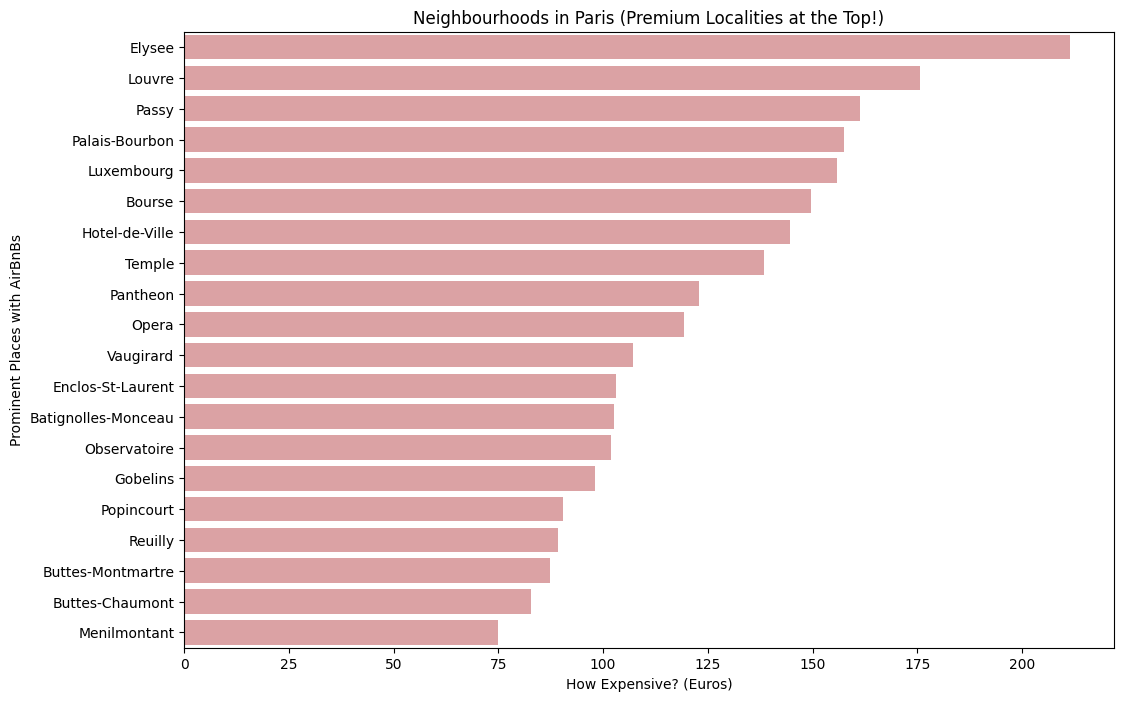

In [45]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_listings_neighbourhood,
           x = "price",
           y = paris_listings_neighbourhood.index,
           color = "#E5989B")
plt.title("Neighbourhoods in Paris (Premium Localities at the Top!)")
plt.xlabel("How Expensive? (Euros)")
plt.ylabel("Prominent Places with AirBnBs")
plt.show()

In [ ]:
# Inside of Paris, the price of AirBnBs is directly impacted by the popularity of the tourist place or 
# the view of Eiffel tower. We need to further see if the prices are increasing when the regulations are imposed.

In [42]:
paris_Elysee_accommodates

,price
accommodates,
14,971.00
13,842.50
11,805.00
16,800.00
12,529.62
10,500.86
9,440.27
7,411.54
8,405.52


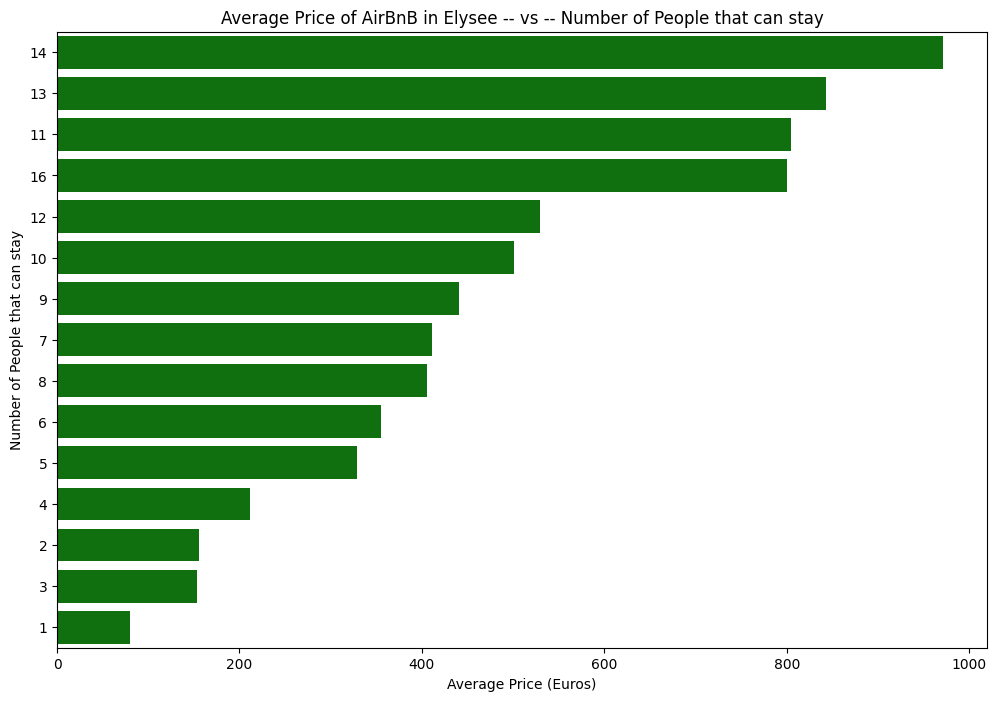

In [43]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_Elysee_accommodates,
           x = "price",
           y = paris_Elysee_accommodates.index,
           color = "green",
           orient = "h",
           order = paris_Elysee_accommodates.index)
plt.title("Average Price of AirBnB in Elysee -- vs -- Number of People that can stay")
plt.xlabel("Average Price (Euros)")
plt.ylabel("Number of People that can stay")
plt.show()

In [ ]:
# The AirBnBs with 14 people accomodation is the costliest, even costlier than 16 accomodates. 
# the same trend is spotted for 11 and 12 accomodates. Every other accomodation looks reasonable.

In [44]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


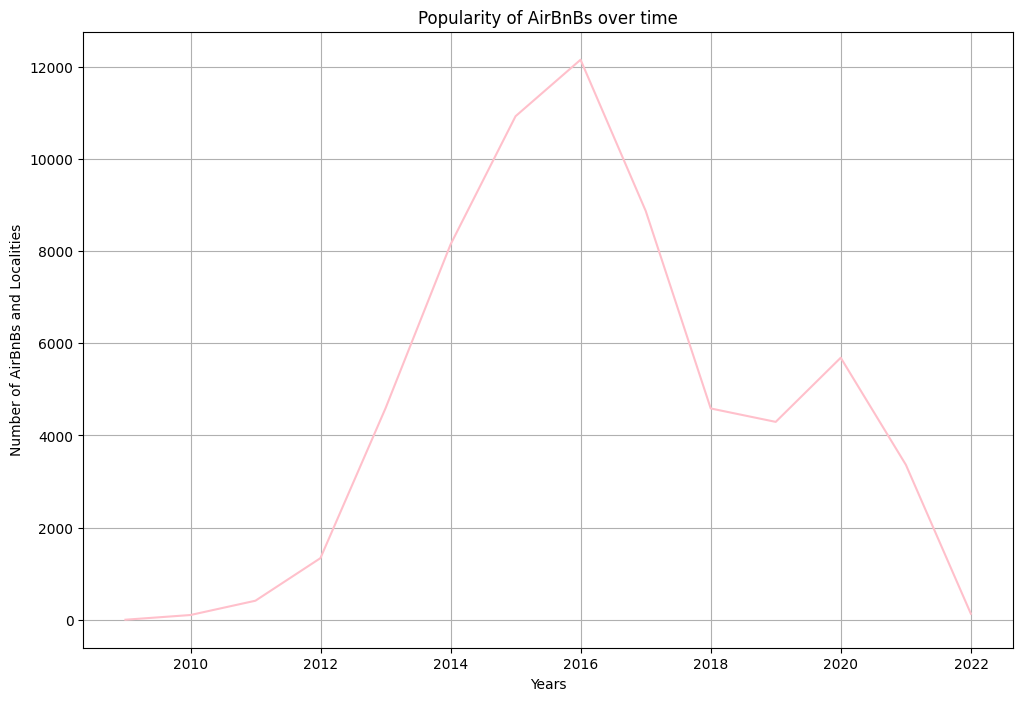

In [45]:
plt.figure(figsize = (12,8))
sns.lineplot(data = paris_listings_over_time["neighbourhood"],color = "pink")
plt.xlabel("Years")
plt.ylabel("Number of AirBnBs and Localities")
plt.title("Popularity of AirBnBs over time")
plt.grid(True)
plt.show()

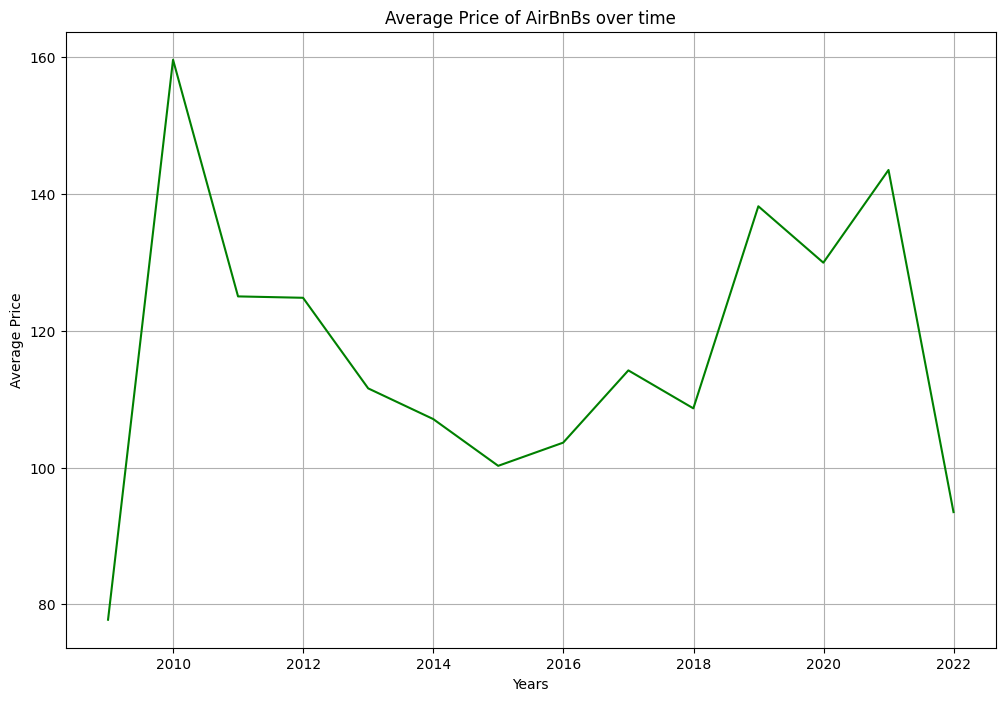

In [46]:
plt.figure(figsize = (12,8))
sns.lineplot(data = paris_listings_over_time["price"],color = "green")
plt.xlabel("Years")
plt.ylabel("Average Price")
plt.title("Average Price of AirBnBs over time")
plt.grid(True)
plt.show()

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding effects of Regulations on AirBnB Business</strong></h1>
</div>

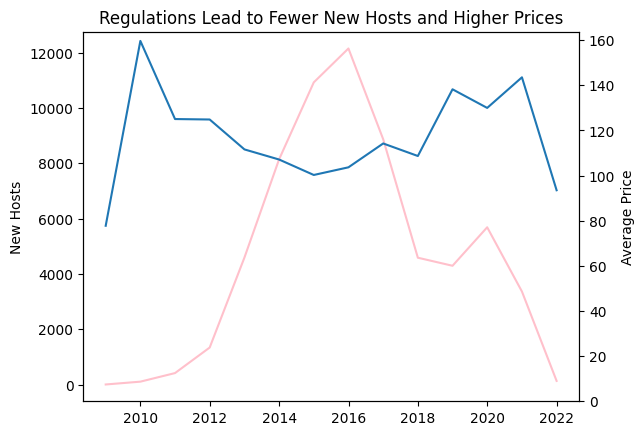

In [47]:
fig , ax = plt.subplots()

ax.plot(paris_listings_over_time.index,paris_listings_over_time["neighbourhood"], label = "New Hosts", c = "pink")

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(paris_listings_over_time.index,paris_listings_over_time["price"], label = "Average Price")

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("Regulations Lead to Fewer New Hosts and Higher Prices")

plt.show()

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Final Insights</strong></h1>
</div>


1. The Number of AirBnBs kept on increasing since the launch and prices kept on increasing too, due to initial traction and early adopters.
2. After the startup is known to everyone and becomes a common utility, AirBnBs start increasing in numbers and prices also kept on decreasing.
3. After regulation was announced around 2015 there was under confidence in the business, number of AirBnBs started decreasing and prices started increasing.
4. Once the regulation is the new normal, during the year 2019 the number of AirBnBs have increased in number and prices kept decreasing due to more supply of them.

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Recommendation for AirBnB</strong></h1>
</div>

1. Regulations in long term rentals can impact the business adversely, there might be customer and hosts churn due to uncertainty.
2. Such regulations might add to AirBnBs losses which might be difficult to recover later.
3. If the customer experience is going to get impacted due to this, it would lead to incorrect brand perception.
4. It is recommended to watch out for any such regulations at other places and be prepared for it.
5. AirBnB can replicate such regulations at other places.
6. They can keep strict rules to onboard and release the hosts.
7. They can limit the number of AirBnBs in a locality to ensure the public has enough rental options and the government doesn't step in.